### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
rating = pd.read_csv("Data.csv")
movie = pd.read_csv("item.csv")
user = pd.read_csv("user.csv")


In [3]:
# Use 3 decimal places in output display
pd.set_option("display.precision", 3)

# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

# Set max rows displayed in output to 25
pd.set_option("display.max_rows", 25)

In [4]:
rating.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
movie.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [6]:
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [7]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [8]:
rating.shape

(100000, 4)

In [9]:
rating.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.625e+02,2.666e+02,1.000e+00,2.540e+02,4.470e+02,6.820e+02,9.430e+02
movie id,100000.0,4.255e+02,3.308e+02,1.000e+00,1.750e+02,3.220e+02,6.310e+02,1.682e+03
rating,100000.0,3.530e+00,1.126e+00,1.000e+00,3.000e+00,4.000e+00,4.000e+00,5.000e+00
timestamp,100000.0,8.835e+08,5.344e+06,8.747e+08,8.794e+08,8.828e+08,8.883e+08,8.933e+08


In [10]:
pd.DataFrame(rating.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
user id,0
movie id,0
rating,0
timestamp,0


In [11]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [12]:
movie.shape

(1681, 22)

In [13]:
movie.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
movie id,1681.0,8.418e+02,485.638,1.0,422.0,842.0,1262.0,1682.0
unknown,1681.0,5.949e-04,0.024,0.0,0.0,0.0,0.0,1.0
Action,1681.0,1.493e-01,0.357,0.0,0.0,0.0,0.0,1.0
Adventure,1681.0,8.031e-02,0.272,0.0,0.0,0.0,0.0,1.0
Animation,1681.0,2.499e-02,0.156,0.0,0.0,0.0,0.0,1.0
Childrens,1681.0,7.258e-02,0.260,0.0,0.0,0.0,0.0,1.0
Comedy,1681.0,3.004e-01,0.459,0.0,0.0,0.0,1.0,1.0
Crime,1681.0,6.484e-02,0.246,0.0,0.0,0.0,0.0,1.0
Documentary,1681.0,2.974e-02,0.170,0.0,0.0,0.0,0.0,1.0
Drama,1681.0,4.313e-01,0.495,0.0,0.0,0.0,1.0,1.0


In [14]:
pd.DataFrame(movie.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
movie id,0
movie title,0
release date,0
unknown,0
Action,0
Adventure,0
Animation,0
Childrens,0
Comedy,0
Crime,0


In [15]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [16]:
user.shape

(943, 5)

In [17]:
user.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user id,943.0,472.000,272.365,1.0,236.5,472.0,707.5,943.0
age,943.0,34.052,12.193,7.0,25.0,31.0,43.0,73.0


In [18]:
pd.DataFrame(user.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
user id,0
age,0
gender,0
occupation,0
zip code,0


### 4. Find the number of movies per genre using the item data - 2.5 marks

In [19]:
movie.sum()

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [20]:
movie.drop("unknown",axis=1 ,inplace = True)

In [21]:
movie.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
movie id,1681.0,841.842,485.638,1.0,422.0,842.0,1262.0,1682.0
Action,1681.0,0.149,0.357,0.0,0.0,0.0,0.0,1.0
Adventure,1681.0,0.080,0.272,0.0,0.0,0.0,0.0,1.0
Animation,1681.0,0.025,0.156,0.0,0.0,0.0,0.0,1.0
Childrens,1681.0,0.073,0.260,0.0,0.0,0.0,0.0,1.0
Comedy,1681.0,0.300,0.459,0.0,0.0,0.0,1.0,1.0
Crime,1681.0,0.065,0.246,0.0,0.0,0.0,0.0,1.0
Documentary,1681.0,0.030,0.170,0.0,0.0,0.0,0.0,1.0
Drama,1681.0,0.431,0.495,0.0,0.0,0.0,1.0,1.0
Fantasy,1681.0,0.013,0.114,0.0,0.0,0.0,0.0,1.0


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [22]:
column_list = list(movie)
column_list.remove('movie id')
column_list.remove('movie title')
column_list.remove('release date')
print(column_list)

['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [23]:
movie["Genres"] = movie[column_list].sum(axis=1)
movie


,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Genres
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
mask = movie['Genres'] > 1
movies_g = movie[["movie title", "Genres"]][mask]
# print(movies_g)
movies_g[mask]

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,movie title,Genres
0,Toy Story,3
1,GoldenEye,3
3,Get Shorty,3
4,Copycat,3
6,Twelve Monkeys,2
...,...,...
1667,MURDER and murder,3
1668,Tainted,2
1671,Mirage,2
1677,B. Monkey,2


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

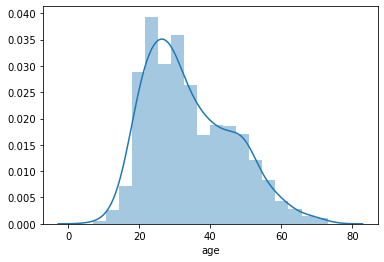

In [25]:
sns.distplot(user["age"])

In [26]:
# df['V'].str.split('-',expand=True)

movie["release year"]=movie["release date"].str.split("-", expand=True)[2]
movie["release year"]

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
1676    1998
1677    1998
1678    1998
1679    1994
1680    1996
Name: release year, Length: 1681, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]),
 <a list of 71 Text major ticklabel objects>)

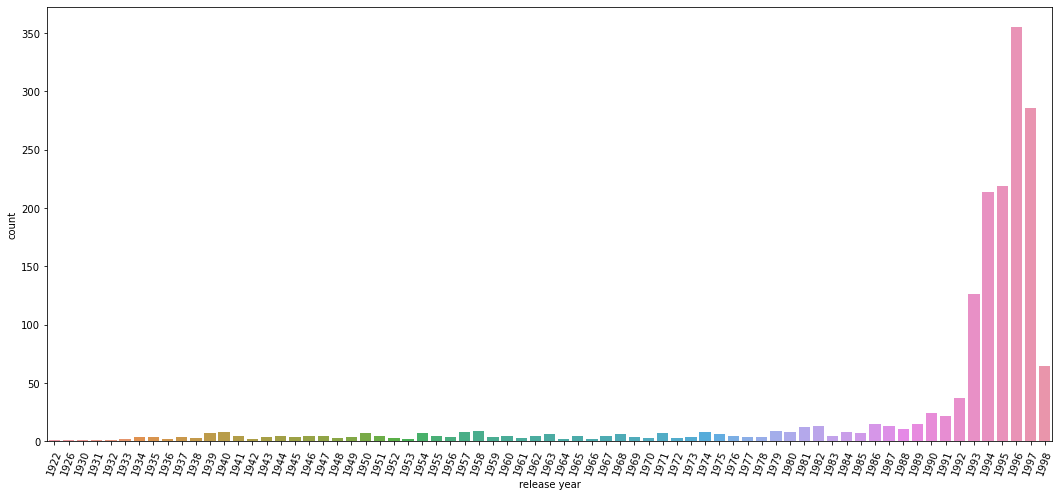

In [27]:
plt.figure(figsize=(18,8))
sns.countplot(movie["release year"])

plt.xticks(rotation=70)

In [28]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


Text(0.5, 1.0, 'Movie Rates per %')

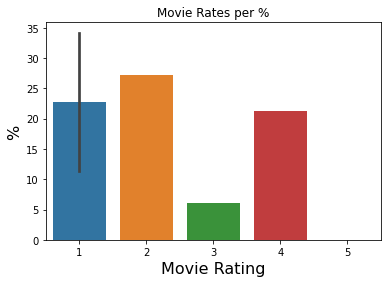

In [29]:
sns.barplot(y=(rating["rating"].value_counts(normalize=True)*100),x=rating["rating"])
plt.xlabel("Movie Rating",fontsize=16)
plt.ylabel("%",fontsize=16)
plt.title("Movie Rates per %")

Text(0.5, 1.0, 'Gender Rates')

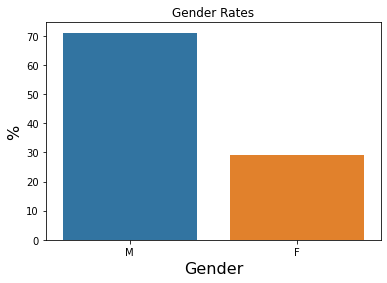

In [30]:
sns.barplot(y=(user["gender"].value_counts(normalize=True)*100),x=user["gender"].unique())
#sns.countplot(data=user["gender"],y=user["gender"].value_counts(normalize=True)*100)
plt.xlabel("Gender",fontsize=16)
plt.ylabel("%",fontsize=16)
plt.title("Gender Rates")


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

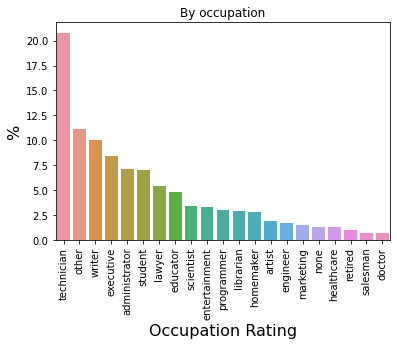

In [31]:
sns.barplot(y=(user["occupation"].value_counts(normalize=True)*100),x=user["occupation"].unique())

plt.xlabel("Occupation Rating",fontsize=16)
plt.ylabel("%",fontsize=16)
plt.title("By occupation")
plt.xticks(rotation=90)


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [32]:
movietable=pd.DataFrame(movie.groupby(['release year'])['release year'].count().reset_index(name="Total Movies"))

movietable.set_index('release year',inplace=True)

movietable["Action"]=movie.groupby(['release year'])['Action'].sum()
movietable["Adventure"]=movie.groupby(['release year'])['Adventure'].sum()
movietable["Animation"]=movie.groupby(['release year'])['Animation'].sum()
movietable["Childrens"]=movie.groupby(['release year'])['Childrens'].sum()
movietable["Comedy"]=movie.groupby(['release year'])['Comedy'].sum()
movietable["Crime"]=movie.groupby(['release year'])['Crime'].sum()
movietable["Documentary"]=movie.groupby(['release year'])['Documentary'].sum()
movietable["Drama"]=movie.groupby(['release year'])['Drama'].sum()
movietable["Fantasy"]=movie.groupby(['release year'])['Fantasy'].sum()
movietable["Film-Noir"]=movie.groupby(['release year'])['Film-Noir'].sum()
movietable["Horror"]=movie.groupby(['release year'])['Horror'].sum()
movietable["Musical"]=movie.groupby(['release year'])['Musical'].sum()
movietable["Mystery"]=movie.groupby(['release year'])['Mystery'].sum()
movietable["Romance"]=movie.groupby(['release year'])['Romance'].sum()
movietable["Sci-Fi"]=movie.groupby(['release year'])['Sci-Fi'].sum()
movietable["Thriller"]=movie.groupby(['release year'])['Thriller'].sum()
movietable["War"]=movie.groupby(['release year'])['War'].sum()
movietable["Western"]=movie.groupby(['release year'])['Western'].sum()



In [33]:
movietable["Total Movies"] = movietable[column_list].sum(axis=1)
movietable

,Total Movies,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,,
1922,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,353,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,381,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,559,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


In [34]:
moviepercent = (movietable.div(movietable['Total Movies'], axis= 0) * 100)
moviepercent

,Total Movies,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,,
1922,100.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1926,100.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1930,100.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1931,100.0,0.000,0.000,0.000,0.000,0.000,33.333,0.000,0.000,0.000,33.333,0.000,0.000,0.000,0.000,0.000,33.333,0.000,0.000
1932,100.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,50.000,0.000,0.000,50.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,100.0,8.499,3.683,1.133,4.249,23.229,2.266,2.550,27.479,0.850,0.000,2.266,0.567,0.567,9.915,1.983,7.082,1.983,1.700
1995,100.0,10.499,5.774,1.575,5.512,16.535,2.887,1.312,23.360,0.787,0.262,3.675,0.787,1.312,9.711,3.937,10.236,1.312,0.525
1996,100.0,7.871,4.293,1.610,3.757,19.320,3.757,3.220,30.411,1.073,0.179,1.968,1.610,1.073,6.798,2.683,8.408,1.610,0.358


In [35]:
moviepercent.reset_index(inplace=True)


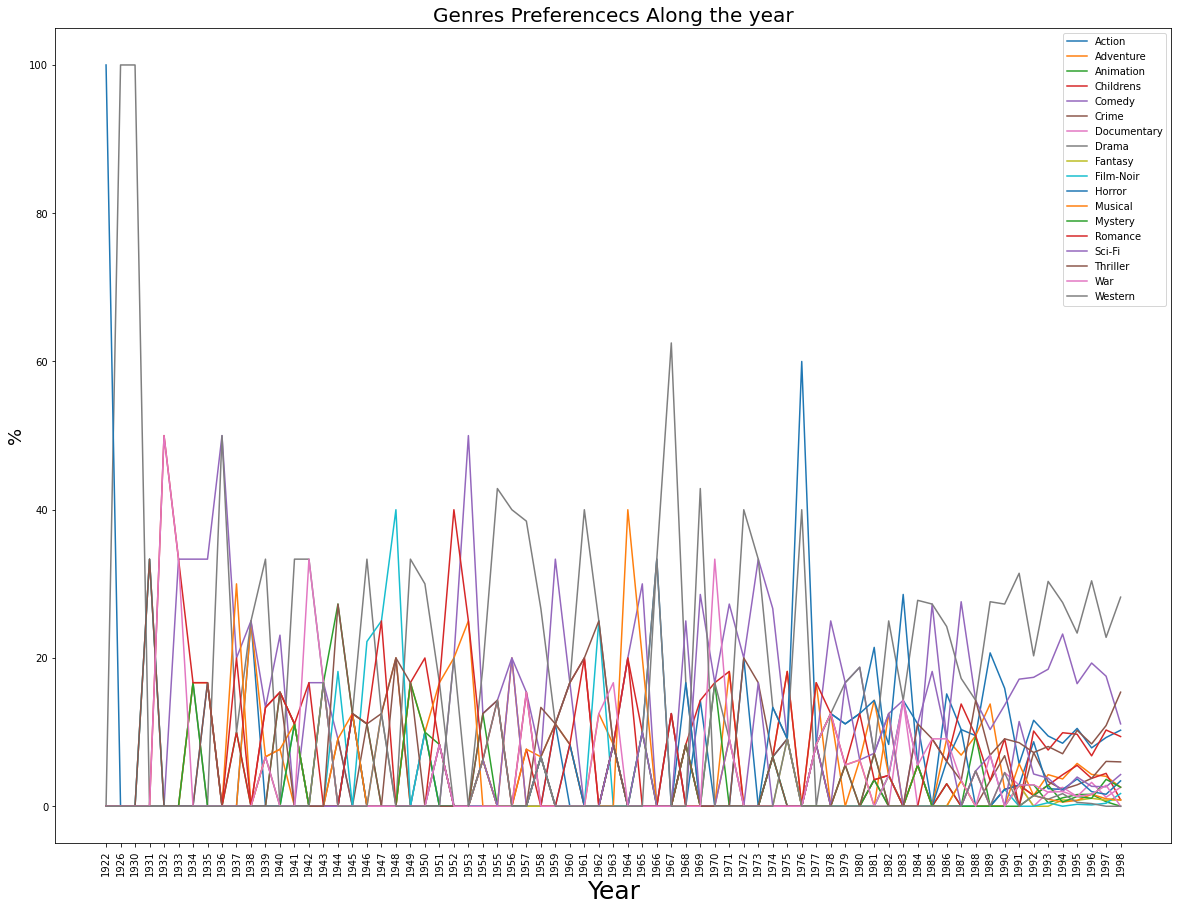

In [36]:
plt.figure(figsize=(20,15))

plt.plot(moviepercent['release year'],moviepercent['Action'], label='Action')
plt.plot(moviepercent['release year'],moviepercent['Adventure'], label='Adventure')
plt.plot(moviepercent['release year'],moviepercent['Animation'], label='Animation')
plt.plot(moviepercent['release year'],moviepercent['Childrens'], label='Childrens')

plt.plot(moviepercent['release year'],moviepercent['Comedy'], label='Comedy')
plt.plot(moviepercent['release year'],moviepercent['Crime'], label='Crime')
plt.plot(moviepercent['release year'],moviepercent['Documentary'], label='Documentary')
plt.plot(moviepercent['release year'],moviepercent['Drama'], label='Drama')

plt.plot(moviepercent['release year'],moviepercent['Fantasy'], label='Fantasy')
plt.plot(moviepercent['release year'],moviepercent['Film-Noir'], label='Film-Noir')
plt.plot(moviepercent['release year'],moviepercent['Horror'], label='Horror')
plt.plot(moviepercent['release year'],moviepercent['Musical'], label='Musical')

plt.plot(moviepercent['release year'],moviepercent['Mystery'], label='Mystery')
plt.plot(moviepercent['release year'],moviepercent['Romance'], label='Romance')
plt.plot(moviepercent['release year'],moviepercent['Sci-Fi'], label='Sci-Fi')
plt.plot(moviepercent['release year'],moviepercent['Thriller'], label='Thriller')

plt.plot(moviepercent['release year'],moviepercent['War'], label='War')
plt.plot(moviepercent['release year'],moviepercent['Western'], label='Western')

plt.xlabel("Year",fontsize=25)
plt.ylabel("%",fontsize=18)
plt.title("Genres Preferencecs Along the year",fontsize=20)
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.show()


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [37]:
rating_group = pd.merge(rating,movie,"left", on="movie id").groupby(["movie id","movie title"]).agg({"movie id":"count", "rating":"mean"})

rating_group.rename(columns={'movie id': 'count', 'rating': 'avg rating'}, inplace=True)
rating_group[rating_group["count"] > 100 ].sort_values("count", ascending=False).head(n=25)


,,count,avg rating
movie id,movie title,,
50,Star Wars,583,4.358
258,Contact,509,3.804
100,Fargo,508,4.156
181,Return of the Jedi,507,4.008
294,Liar Liar,485,3.157
286,"English Patient, The",481,3.657
288,Scream,478,3.441
1,Toy Story,452,3.878
300,Air Force One,431,3.631


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [38]:
# 3 Datasets Merged

rating_movie = pd.merge(rating,movie,"left", on="movie id")
view =pd.merge(rating_movie,user,"right",on = "user id" )
view.sort_values(by=["user id"])

,user id,movie id,rating,timestamp,movie title,release date,Action,Adventure,Animation,Childrens,...,Sci-Fi,Thriller,War,Western,Genres,release year,age,gender,occupation,zip code
0,1,61,4,878542420,Three Colors: White,01-Jan-1994,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1994,24,M,technician,85711
172,1,147,3,875240993,"Long Kiss Goodnight, The",05-Oct-1996,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,1996,24,M,technician,85711
173,1,99,3,875072547,Snow White and the Seven Dwarfs,01-Jan-1937,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,3.0,1937,24,M,technician,85711
174,1,1,5,874965758,Toy Story,01-Jan-1995,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,3.0,1995,24,M,technician,85711
175,1,197,5,875072956,"Graduate, The",01-Jan-1967,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,1967,24,M,technician,85711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99888,943,98,5,888638980,"Silence of the Lambs, The",01-Jan-1991,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,1991,22,M,student,77841
99889,943,559,4,888639638,Interview with the Vampire,01-Jan-1994,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,1994,22,M,student,77841
99890,943,121,3,875502096,Independence Day (ID4),03-Jul-1996,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,3.0,1996,22,M,student,77841
99882,943,161,4,888639772,Top Gun,01-Jan-1986,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,1986,22,M,student,77841


In [39]:
total_men = user[user.gender=="M"]["user id"].count()
total_women = user[user.gender=="F"]["user id"].count()
print("Total   Men: ",total_men, total_men/(total_men+total_women)*100, "%")
print("Total Women: ",total_women, total_women/(total_men+total_women)*100, "%")

Total   Men:  670 71.04984093319194 %
Total Women:  273 28.950159066808055 %


In [40]:
# All women listed in user table rated
len(view.loc[(view["Drama"]==1) & (view["gender"]=="F")].groupby(['user id']).count())

273

In [41]:
# Men watch more drama than women 
men = view[(view.gender=="M")]["Drama"].sum()
women = view[(view.gender=="F")]["Drama"].sum()

print('Rated Dramas by men  :', men,' representing ',men/(men+women)*100, '%')
print('Rated Dramas by women:', women,' representing ',women/(men+women)*100, '%')


Rated Dramas by men  : 28887.0  representing  72.40756987091113 %
Rated Dramas by women: 11008.0  representing  27.592430129088857 %


In [42]:
# Women watch more Sci-Fi than men

scifimen = view[(view.gender=="M")]["Sci-Fi"].sum()

scifiwomen = view[(view.gender=="F")]["Sci-Fi"].sum()

print('Men that watches Sci-Fi :', scifimen,' representing ',scifimen/(scifimen+scifiwomen)*100, '%')
print('Women that watches Sci-Fi:', scifiwomen,' representing ',scifiwomen/(scifimen+scifiwomen)*100, '%')


Men that watches Sci-Fi : 10101.0  representing  79.34799685781618 %
Women that watches Sci-Fi: 2629.0  representing  20.652003142183815 %


In [43]:
#Men watch more Romance than women

rommen = view[(view.gender=="M")]["Romance"].sum()

romwomen = view[(view.gender=="F")]["Romance"].sum()

print('Men that watches Romance  :', rommen,' representing ',rommen/(rommen+romwomen)*100, '%')
print('Women that watches Romance:', romwomen,' representing ',romwomen/(rommen+romwomen)*100, '%')


Men that watches Romance  : 13603.0  representing  69.89877190277993 %
Women that watches Romance: 5858.0  representing  30.10122809722008 %


In [44]:
# THIS WOULD BE ANOTHER APPROACH 
print("How many men rated drama :", len(view.loc[(view["Drama"]==1) & (view["gender"]=="M")].groupby(['user id']).count()))

print("How many women rated drama :", len(view.loc[(view["Drama"]==1) & (view["gender"]=="F")].groupby(['user id']).count()))

print("From this point of view, 100% of men and women watched drama")
print("************************************************************************")

print("How many men rated Sci-Fi :", len(view.loc[(view["Sci-Fi"]==1) & (view["gender"]=="M")].groupby(['user id']).count()))

print("How many women rated Sci-Fi :", len(view.loc[(view["Sci-Fi"]==1) & (view["gender"]=="F")].groupby(['user id']).count()))

print("From this point of view,", len(view.loc[(view["Sci-Fi"]==1) & (view["gender"]=="M")].groupby(['user id']).count())/670*100, "% of men watched Sci-Fi")
print("and ", len(view.loc[(view["Sci-Fi"]==1) & (view["gender"]=="F")].groupby(['user id']).count())/273*100 , "% of women watched Sci-Fi")

print("************************************************************************")

print("How many men rated Romance :", len(view.loc[(view["Romance"]==1) & (view["gender"]=="M")].groupby(['user id']).count()))

print("How many women rated Romance :", len(view.loc[(view["Romance"]==1) & (view["gender"]=="F")].groupby(['user id']).count()))

print("From this point of view,", len(view.loc[(view["Romance"]==1) & (view["gender"]=="M")].groupby(['user id']).count())/670*100, "% of men watched Romance")
print("and ", len(view.loc[(view["Romance"]==1) & (view["gender"]=="F")].groupby(['user id']).count())/273*100 , "% of women watched Romance")



How many men rated drama : 670
How many women rated drama : 273
From this point of view, 100% of men and women watched drama
************************************************************************
How many men rated Sci-Fi : 652
How many women rated Sci-Fi : 256
From this point of view, 97.31343283582089 % of men watched Sci-Fi
and  93.77289377289377 % of women watched Sci-Fi
************************************************************************
How many men rated Romance : 670
How many women rated Romance : 273
From this point of view, 100.0 % of men watched Romance
and  100.0 % of women watched Romance


In [46]:
! jupyter nbconvert --to html Final-MovieLensProjectQuestions.ipynb

[NbConvertApp] Converting notebook Final-MovieLensProjectQuestions.ipynb to html
[NbConvertApp] Writing 849786 bytes to Final-MovieLensProjectQuestions.html
